In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [51]:
path = '/Programming/1_DS_Jobs_analysis/data/jobs_in_data.csv'
df = pd.read_csv(path)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [53]:
df

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


Data Cleaning

In [54]:
df = df.drop(['salary_currency', 'salary'], axis=1)

In [55]:
df.head()

,work_year,job_title,job_category,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,93300,United States,Senior,Full-time,In-person,United States,M


In [63]:
### Средняя зарплата по категориям и уровням
## Установление категориальных значений
df_sorted = df
order = ['Executive', 'Senior', 'Mid-level', 'Entry-level']
df_sorted['experience_level'] = pd.Categorical(df_sorted['experience_level'], categories=order, ordered=True)
df_sorted.sort_values('experience_level')

## Создание таблицы
df_table1 = df_sorted[['job_category', 'experience_level', 'salary_in_usd']].groupby(['job_category', 'experience_level'], observed=True).mean().round(1)
df_table1

salary_in_usd
job_category                   experience_level               
BI and Visualization           Executive              185566.7
                               Senior                 143181.9
                               Mid-level              102050.0
                               Entry-level             85928.6
Cloud and Database             Senior                 155000.0
Data Analysis                  Executive              110156.2
                               Senior                 119798.6
                               Mid-level               96316.7
                               Entry-level             69962.3
Data Architecture and Modeling Executive              167500.0
                               Senior                 160076.4
                               Mid-level              126637.9
Data Engineering               Executive              187123.3
                               Senior                 156001.8
                               Mid-level              115030.7
                               Entry-level             96347.7
Data Management and Strategy   Senior                 110767.4
                               Mid-level              100350.0
                               Entry-level             91003.8
Data Quality and Operations    Senior                 118854.2
                               Mid-level               72483.8
                               Entry-level             36627.0
Data Science and Research      Executive              206460.2
                               Senior                 174374.7
                               Mid-level              129167.1
                               Entry-level            100976.0
Leadership and Management      Executive              189214.0
                               Senior                 152032.2
                               Mid-level              115544.5
                               Entry-level             81012.3
Machine Learning and AI        Executive              206510.5
                               Senior                 191544.4
                               Mid-level              141944.6
                               Entry-level             89076.4

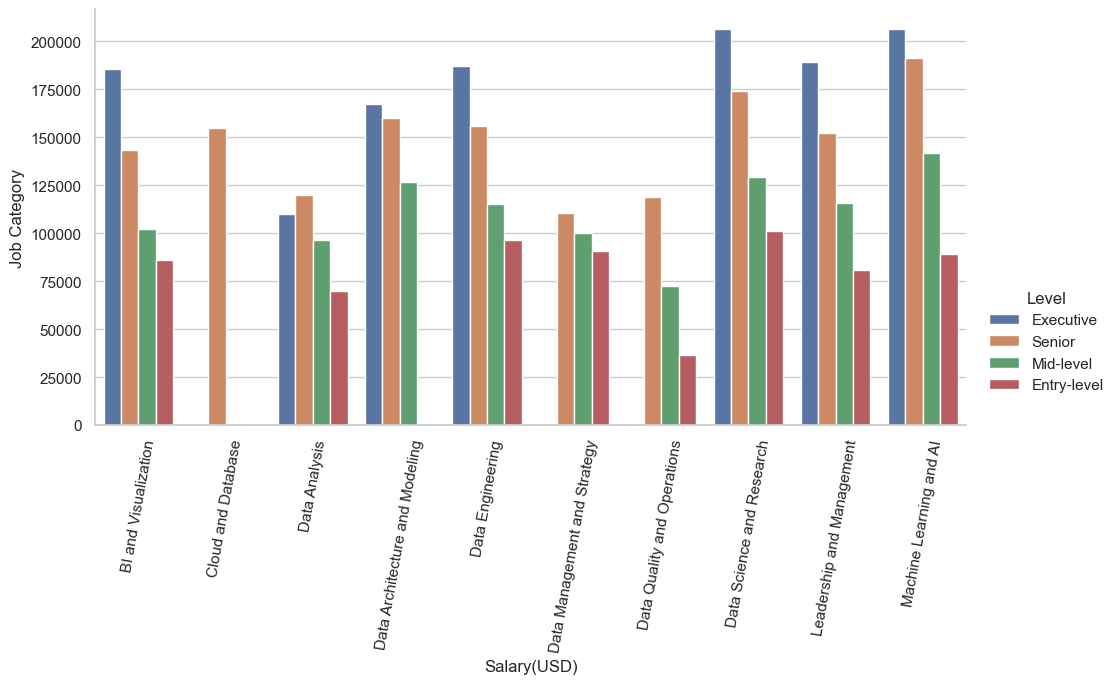

In [175]:
barplot1 = sns.catplot(data=df_table1, kind='bar', 
            x='job_category', 
            y='salary_in_usd', 
            hue='experience_level', 
            height=5, 
            aspect=2)
barplot1.set_axis_labels('Salary(USD)', 'Job Category')
barplot1.legend.set_title('Level')
plt.xticks(rotation=80)
plt.show()

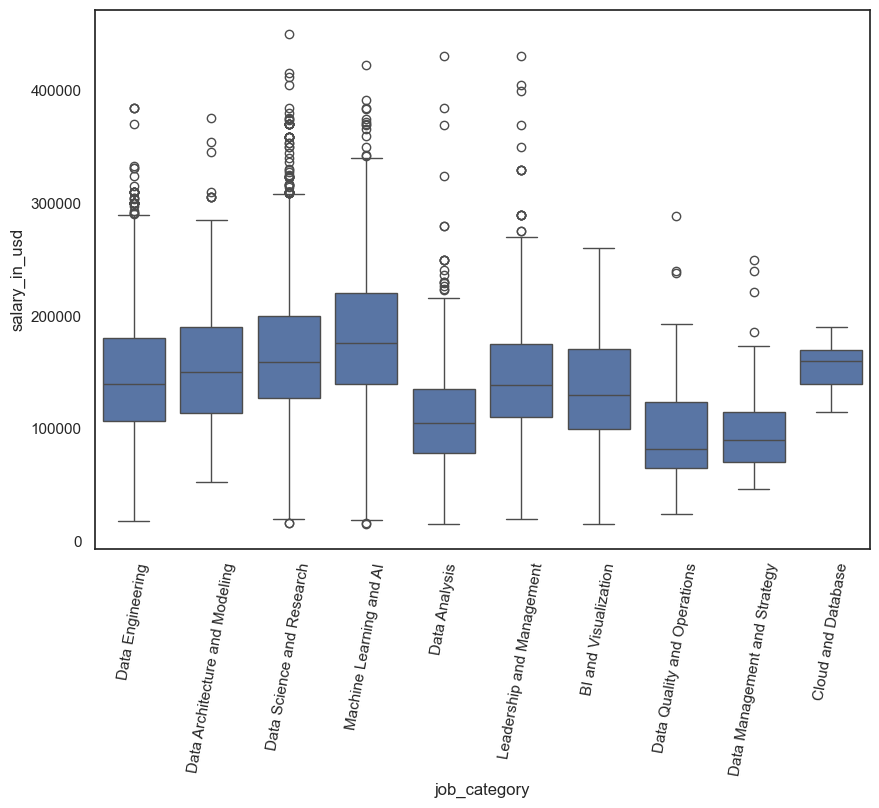

In [179]:
### Разброс зарплат для каждой категории
plt.figure(figsize=(10, 7))
sns.set_theme(style='white')
boxplot1 = sns.boxplot(data=df, x='job_category', y='salary_in_usd')
plt.xticks(rotation=80)
plt.show()

In [107]:
### Круговая диаграмма по количеству вакансий в столбце job_title (10 наиболее часто встречающихся и другие)
s3 = df[['job_title']].value_counts()
df_top10 = s3.nlargest(10).reset_index()
df_other = pd.DataFrame({'job_title': ['others'], 'count': [s3.sum() - df_top10['count'].sum()]})
df_table3 = pd.concat([df_top10[['job_title', 'count']], df_other])
df_table3

,job_title,count
0,Data Engineer,2195
1,Data Scientist,1989
2,Data Analyst,1388
3,Machine Learning Engineer,991
4,Applied Scientist,272
5,Research Scientist,269
6,Analytics Engineer,256
7,Data Architect,213
8,Research Engineer,144
9,Business Intelligence Engineer,144


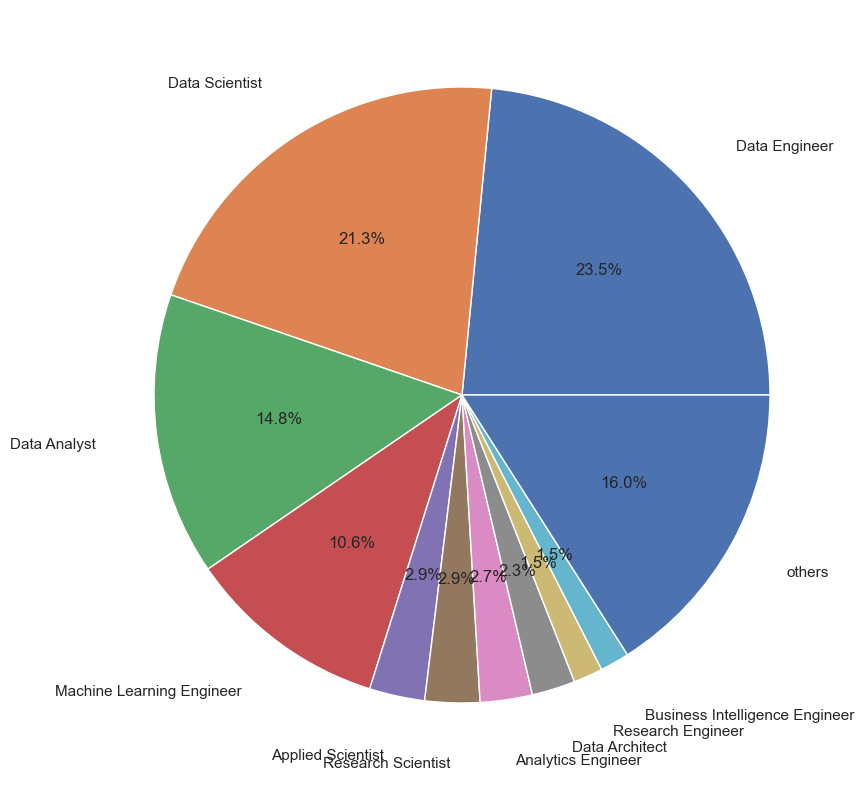

In [194]:
plt.figure(figsize=(10, 10))
pie1 = plt.pie(df_table3['count'], 
               labels=df_table3['job_title'], 
               autopct='%1.1f%%', 
               labeldistance=1.2)
